In [1]:
import numpy as np
import pandas as pd

In [2]:
df_hbo = pd.read_csv('hbo.csv')
df_claro = pd.read_csv('claro.csv')
df_sony = pd.read_csv('sony.csv')
df_netflix = pd.read_csv('netflix.csv')
df_flow = pd.read_csv('flow.csv')
df_amazon = pd.read_csv('amazon.csv')
df_on_video = pd.read_csv('on_video.csv')
df_fox = pd.read_csv('fox.csv')

In [3]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31


In [4]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53


In [5]:
print(len(df_hbo.index))
print(len(df_claro.index))
print(len(df_amazon.index))
print(len(df_netflix.index))
print(len(df_flow.index))
print(len(df_on_video.index))
print(len(df_sony.index))
print(len(df_fox.index))

140
1758
774
1611
374
314
56
241


In [6]:
# ===> Unimos los diferentes dataframes

frames = [df_hbo, df_claro, df_amazon, df_netflix, df_flow, df_on_video, df_sony, df_fox]

df = pd.concat(frames)

In [7]:
print(len(df.index))

5268


In [8]:
df = df.drop_duplicates(subset=['id'])

In [9]:
df = df.drop_duplicates(subset=['title_original'])

In [10]:
print(len(df.index)) # Pareciera que no se comparten tantas peliculas

4445


In [11]:
df['genres']=df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['genres']=df['genres'].str.split(',')

df['keywords']=df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['keywords']=df['keywords'].str.split(',')

df['director']=df['director'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['director']=df['director'].str.split(',')

df['cast']=df['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df['cast']=df['cast'].str.split(',')

In [12]:
# ===> Vamos a crear el vector a partir de los datos en el array de una columna

# ===> Creamos la lista de valores unicos

def create_unique_list(dataframe, column):
    
    list_unique_items = []
    
    for index, row in dataframe.iterrows():
        list_items = row[column]
    
        for item in list_items:
            if item not in list_unique_items:
                list_unique_items.append(item)
            
    return list_unique_items

# ===> binary va iterar sobre los valores de un array y chequear que valores estan en la lista de valores unicos

def binary(list_items, list_unique_items):
    
    binaryList = []
    
    for item in list_unique_items:
        if item in list_items:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# ===> create_vector nos va a devolver el dataframe con una nueva columna, que representa un vector binario del atributo
# ===> en cuestion (genero, cast, director, etc)

def create_vector(dataframe, column_name):
    
    unique_list = create_unique_list(dataframe, column_name)
    
    column_name_vector = column_name + '_bin'
    
    dataframe[column_name_vector] = dataframe[column_name].apply(lambda x: binary(x, unique_list))
    
    return dataframe

In [13]:
df = create_vector(df, 'keywords')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [14]:
df = create_vector(df, 'genres')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
df = create_vector(df, 'director')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
df = create_vector(df, 'cast')
df.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,keywords_bin,genres_bin,director_bin,cast_bin
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"[Acción, Crimen, Suspense]",[JohnSingleton],"[miami, carrace, sportscar, losangeles, car, a...","[PaulWalker, TyreseGibson, EvaMendes, ColeHaus...",32,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2,2,1457,21 gramos,21 Grams,"[Drama, Crimen, Suspense]",[AlejandroGonzálezIñárritu],"[lifeanddeath, lossoflovedone, transplantation...","[SeanPenn, NaomiWatts, BeniciodelToro, DannyHu...",31,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."


In [17]:
# ===> Tenemos el dataframe con todas las peliculas. Vamos a crear una columna que sea una combinacion
# ===> de todos los bins del dataframe

df['combination_bin'] = df['genres_bin'] + df['cast_bin'] +  df['keywords_bin'] + df['director_bin']

In [18]:
# ===> Transformamos esa columna en numpy array de dos dimensiones, lo cual es necesario para poder utilizar esa info
# ===> como inputs de modelos de clustering

df_kmeans = np.vstack(df['combination_bin'])

In [19]:
# ===> Nuestro dataframe tiene 22443 dimensiones

print(len(df_kmeans[0]))

22359


In [20]:
# ===> Vamos a usar SVD para reducir la dimensionalidad de nuestro dataframe
# ===> Otra opcion https://www.researchgate.net/post/Which_clustering_technique_is_most_suitable_for_high_dimensional_data_sets

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(50)
df_transformed = svd.fit_transform(df_kmeans)

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [22]:
kmeans_final = KMeans(n_clusters=25, random_state=0) 
kmeans_final.fit(df_kmeans)
    
labels_final = kmeans_final.labels_

In [23]:
df['labels'] = labels_final

In [24]:
print(df['labels'].unique())

[18 17  6  7  8  4 16  9 10 14  5 23 19 22 24 21 13 11  0 15 20  3  2  1
 12]


In [25]:
print(df['labels'].value_counts())

8     1013
10     777
4      476
7      386
6      314
17     300
14     295
18     197
16     175
9      164
24     139
23     103
22      56
5       24
13       9
19       4
0        3
20       2
3        2
1        1
2        1
12       1
11       1
15       1
21       1
Name: labels, dtype: int64


In [26]:
def add_cluster_if_not_present(dataframe, list_clusters_complete):
    
    list_clusters = dataframe['labels'].unique()
    
    for item in list_clusters_complete:
        
        if item not in list_clusters:
            
            dataframe = dataframe.append({'labels': item, 'frecuency': 0}, ignore_index=True)
            
    return dataframe
    

In [27]:
# ===> Aanaliamos que % de las peliculas de cada plataforma pertenecen a cada cluster

def count_clusters(dataframe, name_plataform):

    df_clusters = pd.DataFrame(dataframe['labels'].value_counts())
    
    df_clusters = df_clusters.rename(columns={'labels': 'frecuency'})
    
    df_clusters['labels'] = df_clusters.index
    
    df_clusters = add_cluster_if_not_present(df_clusters, df['labels'].unique())
    
    def number_rows_parent_dataframe(dataframe):
        return len(dataframe.index)

    def cluster_porcentage(value, dataframe=dataframe):
        return value/number_rows_parent_dataframe(dataframe)*100
    
    name_column = 'percentage_clusters_' + name_plataform 
    
    df_clusters[name_column] = df_clusters['frecuency'].apply(cluster_porcentage)

    return df_clusters


In [28]:
# ===> Agregamos las etiquetas de clusters a la plataforma HBO

df_hbo = pd.merge(df_hbo, df[['id', 'labels']], on='id', how='left')

In [29]:
df_hbo.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,1183,2 Fast 2 Furious: A todo gas 2,2 Fast 2 Furious,"['Acción', 'Crimen', 'Suspense']",['John Singleton'],"['miami', 'car race', 'sports car', 'los angel...","['Paul Walker', 'Tyrese Gibson', 'Eva Mendes',...",32,18
1,2,2,1457,21 gramos,21 Grams,"['Drama', 'Crimen', 'Suspense']",['Alejandro González Iñárritu'],"['life and death', 'loss of loved one', 'trans...","['Sean Penn', 'Naomi Watts', 'Benicio del Toro...",31,17


In [30]:
clusters_hbo = count_clusters(df_hbo, 'hbo')
count_clusters(df_hbo, 'hbo').head(2)

,frecuency,labels,percentage_clusters_hbo
0,27,10,19.285714
1,21,4,15.000000


In [31]:
# ===> Agregamos las etiquetas de clusters a la plataforma Claro

df_claro = pd.merge(df_claro, df[['id', 'labels']], on='id', how='left')

In [32]:
df_claro.head(2)

,Unnamed: 0,Unnamed: 0.1,id,title,title_original,genres,director,keywords,cast,genre_empty,labels
0,0,0,44,500 dias juntos,(500) Days of Summer,"['Comedia', 'Drama', 'Romance']",['Marc Webb'],"['date', 'jealousy', 'fight', 'architect', 'ga...","['Joseph Gordon-Levitt', 'Zooey Deschanel', 'C...",31,8.0
1,2,2,49,Nuestros maravillosos aliados,*batteries not included,"['Comedia', 'Familia', 'Fantasía', 'Ciencia fi...",['Matthew Robbins'],"['extraterrestrial technology', 'alien life-fo...","['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",53,14.0


In [33]:
clusters_claro = count_clusters(df_claro, 'claro')
count_clusters(df_claro, 'claro').head(2)

,frecuency,labels,percentage_clusters_claro
0,358,8.0,20.364050
1,285,10.0,16.211604


In [34]:
# ===> Agregamos las etiquetas de clusters a la plataforma Sony

df_sony = pd.merge(df_sony, df[['id', 'labels']], on='id', how='left')

In [35]:
clusters_sony = count_clusters(df_sony, 'sony')

count_clusters(df_sony, 'sony').head(2)

,frecuency,labels,percentage_clusters_sony
0,8,10,14.285714
1,8,8,14.285714


In [36]:
# ===> Agregamos las etiquetas de clusters a la plataforma Netflix

df_netflix = pd.merge(df_netflix, df[['id', 'labels']], on='id', how='left')

In [37]:
clusters_netflix = count_clusters(df_netflix, 'netflix')

count_clusters(df_netflix, 'netflix').head(2)

,frecuency,labels,percentage_clusters_netflix
0,377,8.0,23.401614
1,319,4.0,19.801366


In [38]:
# ===> Agregamos las etiquetas de clusters a la plataforma Flow

df_flow = pd.merge(df_flow, df[['id', 'labels']], on='id', how='left')

In [39]:
clusters_flow = count_clusters(df_flow, 'flow')

count_clusters(df_flow, 'flow').head(2)

,frecuency,labels,percentage_clusters_flow
0,96,8.0,25.668449
1,46,10.0,12.299465


In [40]:
# ===> Agregamos las etiquetas de clusters a la plataforma Amazon

df_amazon = pd.merge(df_amazon, df[['id', 'labels']], on='id', how='left')

In [41]:
clusters_amazon = count_clusters(df_amazon, 'amazon')

count_clusters(df_amazon, 'amazon').head(2)

,frecuency,labels,percentage_clusters_amazon
0,178,8.0,22.997416
1,166,10.0,21.447028


In [42]:
# ===> Agregamos las etiquetas de clusters a la plataforma On Video

df_on_video = pd.merge(df_on_video, df[['id', 'labels']], on='id', how='left')

In [43]:
clusters_on_video = count_clusters(df_on_video, 'on_video')

count_clusters(df_on_video, 'on_video').head(2)

,frecuency,labels,percentage_clusters_on_video
0,60,10.0,19.108280
1,56,8.0,17.834395


In [44]:
# ===> Agregamos las etiquetas de clusters a la plataforma Fox

df_fox = pd.merge(df_fox, df[['id', 'labels']], on='id', how='left')

In [45]:
clusters_fox = count_clusters(df_fox, 'fox')

count_clusters(df_fox, 'fox').head(2)

,frecuency,labels,percentage_clusters_fox
0,77,8.0,31.950207
1,28,10.0,11.618257


In [46]:
df_clusters_final = pd.merge(clusters_hbo[['labels', 'percentage_clusters_hbo']], clusters_claro[['labels', 'percentage_clusters_claro']], on='labels', how='left')

In [47]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro
0,10,19.285714,16.211604
1,4,15.000000,3.071672


In [48]:
df_clusters_final = pd.merge(df_clusters_final, clusters_sony[['labels', 'percentage_clusters_sony']], on='labels', how='left')

In [49]:
df_clusters_final = pd.merge(df_clusters_final, clusters_netflix[['labels', 'percentage_clusters_netflix']], on='labels', how='left')

In [50]:
df_clusters_final = pd.merge(df_clusters_final, clusters_flow[['labels', 'percentage_clusters_flow']], on='labels', how='left')

In [51]:
df_clusters_final = pd.merge(df_clusters_final, clusters_amazon[['labels', 'percentage_clusters_amazon']], on='labels', how='left')

In [52]:
df_clusters_final = pd.merge(df_clusters_final, clusters_on_video[['labels', 'percentage_clusters_on_video']], on='labels', how='left')

In [53]:
df_clusters_final = pd.merge(df_clusters_final, clusters_fox[['labels', 'percentage_clusters_fox']], on='labels', how='left')

In [54]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,10,19.285714,16.211604,14.285714,15.332092,12.299465,21.447028,19.108280,11.618257
1,4,15.000000,3.071672,0.000000,19.801366,5.080214,8.527132,2.866242,2.904564


In [55]:
print(df_clusters_final['labels'].values)

[10  4  8  7 17  6 14 18 16  9 22 24 23 19  5 21 13 11  0 15 20  3  2  1
 12]


In [56]:
df_clusters_final_transpose = df_clusters_final[['percentage_clusters_hbo',	'percentage_clusters_claro',	'percentage_clusters_sony',	'percentage_clusters_netflix'	,'percentage_clusters_flow',	'percentage_clusters_amazon',	'percentage_clusters_on_video',	'percentage_clusters_fox']].transpose()

In [57]:
df_clusters_final_transpose.columns = df_clusters_final['labels'].values

In [58]:
df_clusters_final_transpose.head(2)

,10,4,8,7,17,6,14,18,16,9,...,21,13,11,0,15,20,3,2,1,12
percentage_clusters_hbo,19.285714,15.000000,13.571429,8.571429,7.142857,7.142857,6.428571,4.285714,4.285714,4.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
percentage_clusters_claro,16.211604,3.071672,20.364050,11.262799,7.110353,8.930603,8.532423,5.290102,4.778157,5.403868,...,0.056883,0.113766,0.056883,0.170648,0.056883,0.113766,0.0,0.0,0.0,0.0


In [59]:
df_numpy_array_platforms = df_clusters_final_transpose.values

In [60]:
print(df_numpy_array_platforms)

[[19.28571429 15.         13.57142857  8.57142857  7.14285714  7.14285714
   6.42857143  4.28571429  4.28571429  4.28571429  3.57142857  2.85714286
   2.14285714  0.71428571  0.71428571  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [16.2116041   3.07167235 20.36405006 11.26279863  7.11035267  8.93060296
   8.53242321  5.29010239  4.778157    5.40386803  1.08077361  3.35608646
   2.90102389  0.22753129  0.62571104  0.05688282  0.11376564  0.05688282
   0.17064846  0.05688282  0.11376564  0.          0.          0.
   0.        ]
 [14.28571429  0.         14.28571429  7.14285714 10.71428571  3.57142857
   5.35714286 10.71428571  5.35714286 12.5         0.          3.57142857
   5.35714286  7.14285714  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [15.33209187 19.80136561 23.4016139   7.13842334  5.77281192  6.51769088
   5.33829919  3.53817505  2.9174

In [61]:
# ===> Graficamos las 8 plataformas en un espacio de dos dimensiones

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, metric = 'cosine')
#tsne = TSNE(perplexity = 10, metric='precomputed', random_state = 12)

result = tsne.fit_transform(df_numpy_array_platforms)


In [62]:
platforms = ['HBO', 'Claro', 'Sony', 'Netflix', 'Flow', 'Amazon', 'On Video', 'Fox']

In [63]:
import matplotlib.pyplot as plt

# ===> La forma que se genera parece demasiado simetrica. Es raro, no?

fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(result[:,0], result[:,1])

for i, txt in enumerate(platforms):
    ax.annotate(txt, (result[i,0], result[i,1]))

In [64]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(2)
clusters_transformed = svd.fit_transform(df_numpy_array_platforms)

In [65]:
print(clusters_transformed)

[[ 30.6819137    8.56015378]
 [ 32.92042886  -3.50907021]
 [ 27.77807997 -11.15629371]
 [ 34.50138714  12.58122598]
 [ 33.92135752  -2.85786325]
 [ 35.71982757   3.31659068]
 [ 32.4656106   -4.16949739]
 [ 36.34713263  -4.33187678]]


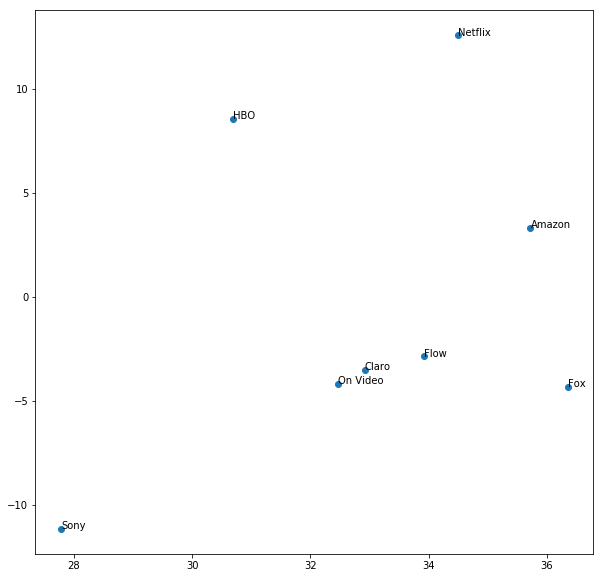

In [66]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(clusters_transformed[:,0], clusters_transformed[:,1])

for i, txt in enumerate(platforms):
    ax.annotate(txt, (clusters_transformed[i,0], clusters_transformed[i,1]))

In [67]:
df_clusters_final_transpose

,10,4,8,7,17,6,14,18,16,9,...,21,13,11,0,15,20,3,2,1,12
percentage_clusters_hbo,19.285714,15.000000,13.571429,8.571429,7.142857,7.142857,6.428571,4.285714,4.285714,4.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
percentage_clusters_claro,16.211604,3.071672,20.364050,11.262799,7.110353,8.930603,8.532423,5.290102,4.778157,5.403868,...,0.056883,0.113766,0.056883,0.170648,0.056883,0.113766,0.000000,0.000000,0.000000,0.000000
percentage_clusters_sony,14.285714,0.000000,14.285714,7.142857,10.714286,3.571429,5.357143,10.714286,5.357143,12.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
percentage_clusters_netflix,15.332092,19.801366,23.401614,7.138423,5.772812,6.517691,5.338299,3.538175,2.917443,3.476102,...,0.000000,0.372439,0.000000,0.000000,0.000000,0.000000,0.062073,0.000000,0.062073,0.062073
percentage_clusters_flow,12.299465,5.080214,25.668449,11.497326,7.219251,6.149733,4.278075,6.149733,5.347594,5.882353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267380,0.000000,0.000000
percentage_clusters_amazon,21.447028,8.527132,22.997416,8.656331,7.622739,6.201550,4.909561,4.392765,4.005168,2.325581,...,0.000000,0.387597,0.000000,0.129199,0.000000,0.000000,0.129199,0.129199,0.000000,0.000000
percentage_clusters_on_video,19.108280,2.866242,17.834395,11.783439,7.006369,5.732484,9.872611,4.140127,3.821656,7.006369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
percentage_clusters_fox,11.618257,2.904564,31.950207,10.788382,3.734440,3.734440,9.128631,4.564315,4.979253,3.734440,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
df_clusters_final.head(2)

,labels,percentage_clusters_hbo,percentage_clusters_claro,percentage_clusters_sony,percentage_clusters_netflix,percentage_clusters_flow,percentage_clusters_amazon,percentage_clusters_on_video,percentage_clusters_fox
0,10,19.285714,16.211604,14.285714,15.332092,12.299465,21.447028,19.108280,11.618257
1,4,15.000000,3.071672,0.000000,19.801366,5.080214,8.527132,2.866242,2.904564


In [69]:
df_clusters_final_comparison = df_clusters_final.copy()

In [70]:
df_clusters_final_comparison['claro_flow'] = df_clusters_final_comparison['percentage_clusters_claro'] - df_clusters_final_comparison['percentage_clusters_flow']

In [71]:
df_clusters_final_comparison.sort_values(by='claro_flow', ascending=False).plot("labels", "claro_flow", kind="barh", color=sns.color_palette("deep", 1), figsize=(8,8))

NameError: name 'sns' is not defined

In [ ]:
df_clusters_final_comparison['claro_netflix'] = df_clusters_final_comparison['percentage_clusters_claro'] - df_clusters_final_comparison['percentage_clusters_netflix']

In [ ]:
df_clusters_final_comparison.sort_values(by='claro_netflix', ascending=False).plot("labels", "claro_netflix", kind="barh", color=sns.color_palette("deep", 1),figsize=(8,8))